In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np #para trabajar con matrices

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
#crea valores iniciales 
def weight_variable(shape):
    init = tf.random_normal(shape, stddev=0.01)
    return tf.Variable(init)

#es la funcion de convolucion
def conv2d(x, W):
    #strides es como se va a mover el nucleo de convolucion en la imagen
    #padding es para que si el nucleo se sale de la imagen rellene con
    #ceros, asi se puede convolucionar hasta el ultimo pixel
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

#reducir el tamano de la imagen
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [5]:
x = tf.placeholder(tf.float32, [None, 784])

#son las salidas ideales, sirve para entrenar la red neuronal
y_ = tf.placeholder(tf.float32, [None, 10])

#tf.placeholder devuelve vectorizado, pero nosotros necesitamos imagen
#para que el convNet evalue caracteristicas y no intensidades

#-1 en la primera dimension tiene que haber tantas lineas como se le haya pasado
#los 28 son la dimension de la imagen
#1 es porque solo trabajamos en 1 escala de grises , 1 solo canal
x_image = tf.reshape(x, [-1,28,28,1])

#definimos el nucleo de convolucion de 5x5, 1 solo canal, 
#y seran 10 neuronas de convolucion
w_conv = weight_variable([5,5,1,10])

#un valor por cada neurona de convolucion
b_conv = weight_variable([10])

#para la ultima capa, perceptron simple
#los 14 son porque desde el pooling nos llegan imagenes de 14x14
#desde 10 neuronas convolucionales
#el 400 es porque nosotros definimos que sea asi

w_fc1 = weight_variable([14*14*10, 400])
b_fc1 = weight_variable([400])

#es 400 porque es lo que nos llega de fc1
#es 10 porque al final las salidas son 10
w_fc2 = weight_variable([400, 10])
b_fc2 = weight_variable([10])


In [7]:
#operaciones del modelo

#h es de hide, capas intermedias del modelo
#relu es una version sencilla de la tangente hiperbolica o sigmoide
#relu define para valores menores que cero es cero
#para valores mayores que cero es ese mismo valor
#no se necesita mucho procesamiento como con las demas
h_conv = tf.nn.relu(conv2d(x_image, w_conv) + b_conv)

#reducimos la imagen
h_pool = max_pool_2x2(h_conv)

#convertimos la salida en imagen en vectorial,para pasarla al 
#perceptron simple
h_pool_flat = tf.reshape(h_pool, [-1,14*14*10])

#calculamos el perceptron simple
h_cf1 = tf.nn.relu(tf.matmul(h_pool_flat, w_fc1) + b_fc1)

#salida
y = tf.nn.softmax(tf.matmul(h_cf1, w_fc2) + b_fc2)

#funcion de error
mse = tf.reduce_mean(tf.square(y - y_))

#variables para el entrenamiento

#primo de decenso de gradiente
train_step = tf.train.AdamOptimizer(0.01).minimize(mse)

#iniciar tensorflow para que realize el trabajo
init = tf.initialize_all_variables()
sess = tf.Session()

sess.run(init)




In [9]:
#entrenamiento

for i in range(350):
    #estocastico, solo trabajamos con una muestra
    batchX, batchY = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x:batchX, y_:batchY})
    
    if(i % 50 == 0):
        print 'iteration: ' + str(i) + ' train MSE: ' + str(sess.run(mse, feed_dict={x:batchX, y_:batchY}))

print 'training finished'

iteration: 0 train MSE: 0.0891496
iteration: 50 train MSE: 0.0078194
iteration: 100 train MSE: 0.0064265
iteration: 150 train MSE: 0.0054651
iteration: 200 train MSE: 0.00253997
iteration: 250 train MSE: 0.00404564
iteration: 300 train MSE: 0.00285442
training finished


In [10]:
#ahora recien vamos a evaluar las imagenes
#contra la red neuronal para ver si clasifica correctamente

preds = sess.run(y, feed_dict={x:mnist.test.images, y_:mnist.test.labels})

#obtiene la neurona que mas ha reaccionado
preds = np.argmax(preds, axis=1)

trueLabels = np.argmax(mnist.test.labels, axis=1)


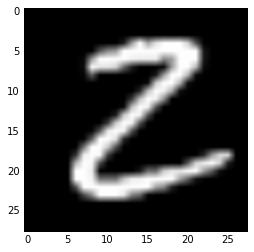

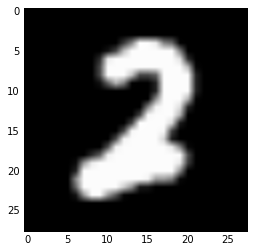

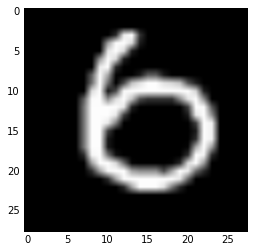

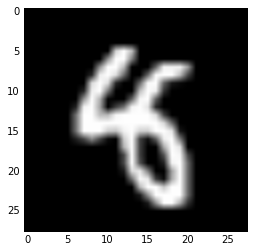

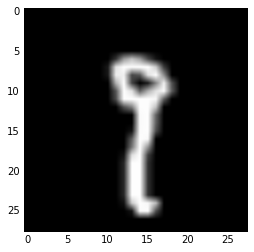

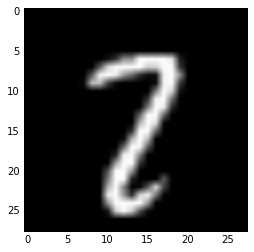

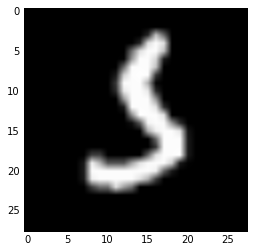

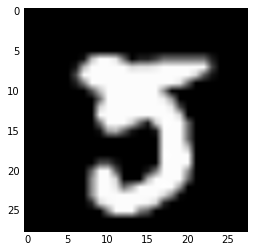

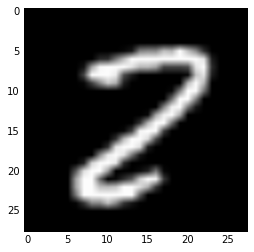

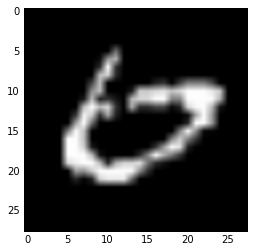

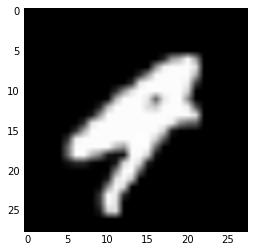

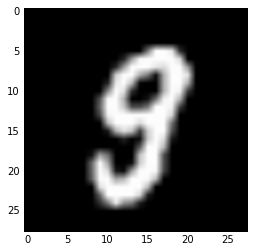

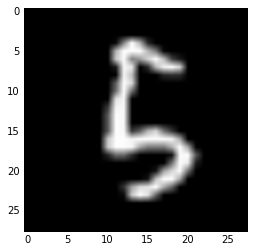

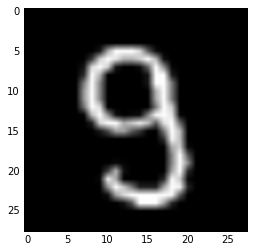

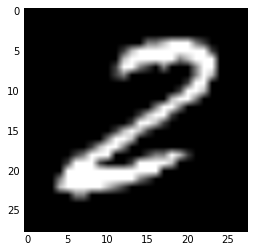

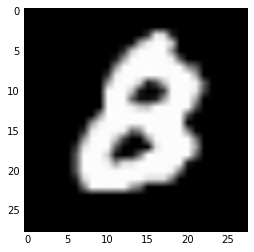

test error: 0.0331


In [13]:
# importante poner el punto 0. porque sino lo toma como int y da errores
errors = 0.

for i in range(preds.shape[0]):
    #argmax devuelve el indice del elemento mayor de un vector
    #la prediccion es la misma que la imagen
    if(preds[i] != trueLabels[i]):
        #para saber con que imagenes estamos fallando
        if(i < 500):
            plt.imshow(mnist.test.images[i].reshape(28,28), cmap='gray')
            
            #para que cree nuevas graficas
            plt.show()
        errors = errors + 1
        
print 'test error: ' + str(errors/preds.shape[0])



In [14]:
#podemos visualizar los kernels de aprendizaje, modelos de convolucion

kernels = sess.run(w_conv)

print kernels.shape

(5, 5, 1, 10)


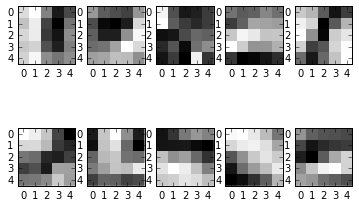

In [15]:
#sabemos que hay 10 filtros

f, axes = plt.subplots(2,5)

for i in range(10):
    axes.ravel()[i].imshow(kernels[:,:,0,i], cmap='gray', interpolation='none')
    

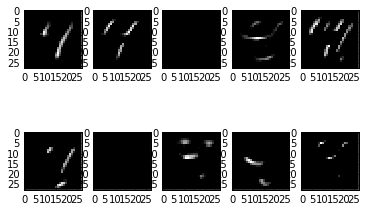

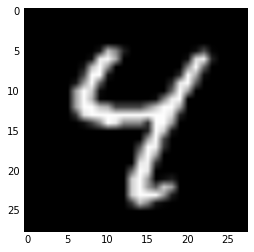

In [17]:
#podemos ver como queda la imagen despues de pasar por la convolucion
acts = sess.run(h_conv, feed_dict={x:mnist.test.images[0:100]})

f, axes = plt.subplots(2,5)

index = 6

for i in range(10):
    axes.ravel()[i].imshow(acts[index, :, :, i], cmap='gray', interpolation='none')

plt.show()

plt.imshow(mnist.test.images[index].reshape(28, 28), cmap = 'gray')



    